<a href="https://colab.research.google.com/github/daniel-lorenzo/Maquinas_electricas/blob/master/Unidad0/Ejemplo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo
- Encontrar los equivalentes de Thevenin y Norton de la red conectada a la resistencia de $1 \, \Omega$.
- Calcular la potencia absorbida por la resistencia de $1 \, \Omega$ utilizando ambos circuitos equivalentes.

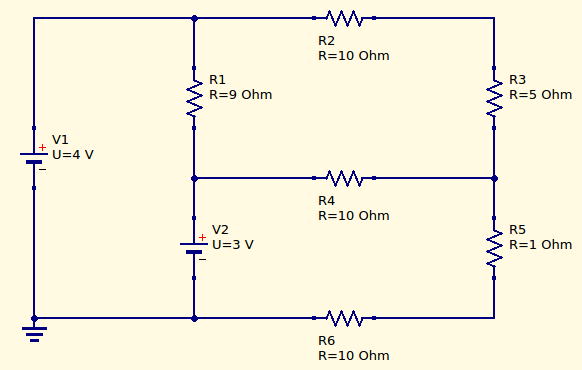

## Solución

Hacemos:
1. $V_{TH}$
2. $i_N$
3. $R_{TH} = R_N$

In [1]:
# Datos:
R1 = 9 # [Ohm]
R2 = 10 # [Ohm]
R3 = 5 # [Ohm]
R4 = 10 # [Ohm]
R5 = 1 # [Ohm]
R6 = 10 # [Ohm]
V_1 = 4 # [V]
V_2 = 3 # [V]

### Hallamos $R_{TH}$
- Fuentes de voltaje en corto.
- Fuentes de corriente, circuito abierto.
- La resistencia $R_1$ queda contocircuitda.
- Las resistencias $R_2$ y $R_3$ están en serie.
- Luego tenemos en paralelo $R_4$
- Por último $R_6$ en serie

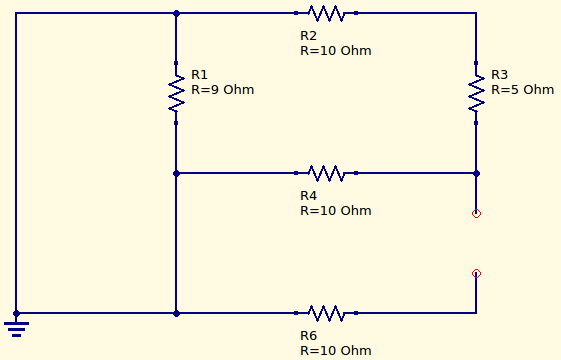

In [2]:
# R2 y R3 en serie
R_eq1 = R2 + R3
# R_eq1 // R4 
R_eq2 = (R_eq1 * R4)/(R_eq1 + R4)
# R_eq2 y R6 en serie
R_th = R_eq2 + R6

In [3]:
#@title Resistencia Thévenin
print('R_th = %.1f [Ohm]'%R_th)

R_th = 16.0 [Ohm]


### Calculamos las corrientes en la malla 1 y 2

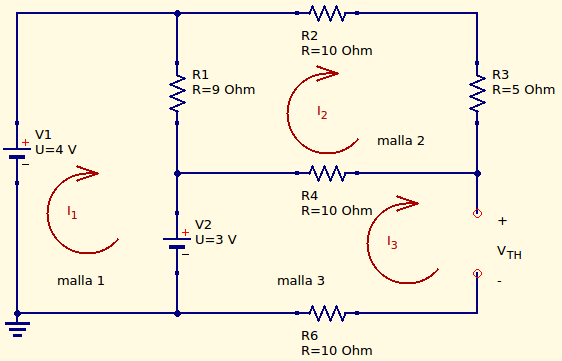

En forma matricial:
$$
\begin{bmatrix}
R_{11} & R_{12}  \\
R_{21} & R_{22}  \\
\end{bmatrix}
\begin{bmatrix}
U_1 \\
U_2 
\end{bmatrix}
$$

Hacemos:
$$
\begin{bmatrix}
R_1 & -R_1 \\
-R_1 & R_1 + R_2 + R_3 + R_4
\end{bmatrix}
\begin{bmatrix}
V_1 - V_2 \\
0
\end{bmatrix}
$$

Reemplazamos:
$$
\begin{bmatrix}
9 & -9 \\
-9 & 34
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

Aplicamos regla de Cramer
$$
\Delta R =
\left|
\begin{array}{ll}
9 & -9 \\
-9 & 34
\end{array}
\right|
$$

$$
\Delta I_1 =
\left|
\begin{array}{ll}
1 & -9 \\
0 & 34
\end{array}
\right|
$$

$$
\Delta I_2 =
\left|
\begin{array}{ll}
9 & 1 \\
-9 & 0
\end{array}
\right|
$$

Entonces:
$$
I_1 = \frac{\Delta I_1}{\Delta R} \qquad ; \qquad I_2 = \frac{\Delta I_2}{\Delta R}
$$

In [4]:
import numpy as np

In [5]:
ΔR = np.linalg.det( np.array([[9,-9],[-9,34]]) )
ΔI_1 = np.linalg.det( np.array([[1,-9],[0,34]]) )
ΔI_2 = np.linalg.det( np.array([[9,1],[-9,0]]) )

In [6]:
I_1 = ΔI_1/ΔR
I_2 = ΔI_2/ΔR

In [7]:
#@title Determinantes
print('ΔR = %.0f'%ΔR)
print('ΔI_1 = %.0f'%ΔI_1)
print('ΔI_2 = %.0f'%ΔI_2)

ΔR = 225
ΔI_1 = 34
ΔI_2 = 9


In [8]:
#@title Corrientes 1 y 2
print('I_1 = %.3f [A]'%I_1)
print('I_2 = %.3f [A]'%I_2)

I_1 = 0.151 [A]
I_2 = 0.040 [A]


### Hallamos el voltaje de Thévenin

Malla 3
$$
V_2 - I_3 R_4 + I_2 R_4 - V_{TH} - I_3 R_6 = 0
$$

$$
V_{TH} = V_2 - I_3 R_4 + I_2 R_4 - I_3 R_6
$$

$I_3 = 0$
$$
V_{TH} = V_2 + I_2 R_4
$$

In [9]:
I_3 = 0
V_th = V_2 + I_2*R4

In [10]:
#@title Voltaje Thevenin
print('V_th = %.2f [V]'%V_th)

V_th = 3.40 [V]


### Circuito equivalente Thévenin:

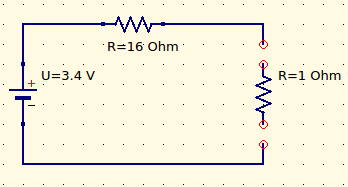

Conectamos la resistencia de 1 Ω
$$
V_{th} - I_t R_{th} - I_t R_5 = 0
$$

$$ V_{th} = I_t (R_{th} + R_5) $$

$$ I_t = \frac{V_{th}}{R_{th} + R_5} $$

Diferencia de potencial en la resistencia de 1 Ω
$$ V_{R5} = I_t R_5 $$

La potencia es
$$ P = VI $$

In [11]:
# Corriente que circula cuando conectamos 
# la resistencia de 1 Ω la circuito de Thevenin
I_t = V_th/(R_th + R5)
# Voltaje en R5
V_R5 = I_t*R5
# Potencia disipada en R5
P_R5 = V_R5*I_t

In [12]:
#@title Resultados
print('I_t = %.3f [A]'%I_t)
print('V_R5 = %.3f [V]'%V_R5)

I_t = 0.200 [A]
V_R5 = 0.200 [V]


In [13]:
#@title Potencia disipada en R5 (1 ohm)
print('P_R5 = %.3f [W]'%P_R5)

P_R5 = 0.040 [W]


### Calculamos la corriente Norton
Para ello aplicamos el método de nodos.

$$
\sum I_{in} + \sum I_{out} = 0
$$

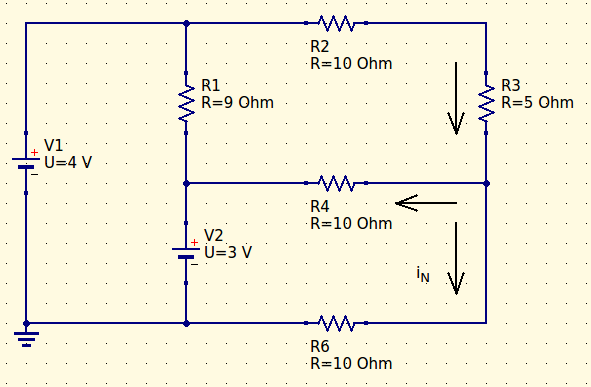

$$
\frac{V_1 - V_x}{R_2 + R_3} - \frac{V_x - V_2}{R_4} - \frac{V_x}{R_6} = 0
$$

Reemplazamos:
$$
\frac{4-V_x}{15} - \frac{V_x - 3}{10} - \frac{V_x}{10} = 0
$$

$$ V_x = \frac{17}{8} \, \mathrm{[V]}$$

In [14]:
import sympy as sp

In [15]:
# Usamos sympy para resolver la ecuación (opcional)
Vx = sp.symbols('Vx')

eq1 = sp.Eq( (V_1 - Vx)/(R2 + R3) - (Vx - V_2)/R4 - Vx/R6, 0)
Sol = sp.solve(eq1,Vx)
Vx = Sol[0]

In [16]:
print('Vx = ', Sol[0],'[V]')
print('Vx = ', round(Sol[0],3),'[V]')

Vx =  17/8 [V]
Vx =  2.125 [V]


$$
I_N = \frac{V_x}{R_6}
$$

Reemplazando
$$
I_N = \frac{17/8}{10} = \frac{17}{80} \; \mathrm{[A]}
$$

In [17]:
I_N = Vx/R6

In [18]:
#@title Corriente Norton
print('I_N = %.3f [A]'%I_N)

I_N = 0.212 [A]


### Circuito equivalente Norton

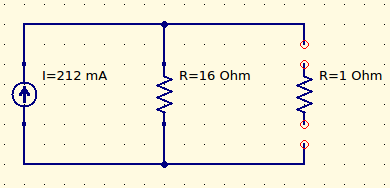

Conectamos la resistencia de $1 \; \Omega$ y averiguamos la resistencia equivalente:

$$
R_{eq} = \frac{16 \times 1}{16 + 1} = \frac{16}{17} = 0,9412 \; \Omega
$$

El votaje en los terminales es:
$$
V_N = I_N R_{eq} = \frac{17}{80} \times \frac{16}{17} = \frac{1}{5} = 0,2 \; \mathrm{V}
$$

Luego la corrientes por la resistencia de 1 ohm es:

$$
I_{R} = \frac{V_N}{R} = \frac{1/5}{1} = \frac{1}{5} = 0,2 \; \mathrm{A}
$$

La potencia disipada en la resistencia de 1 ohm

$$
P = VI = 0,2 \times 0,2 = 0,04 \; \mathrm{W}
$$

In [19]:
R_N = R_th

R_eq = (R_N*R5)/(R_N + R5)

In [20]:
V_N = I_N*R_eq
I_R = V_N/R5
P = V_N*I_R

In [21]:
#@title Resultados
print('R_eq = %.4f [Ohm]'%R_eq)
print('V_N = %.2f [V]'%V_N)
print('I_R = %.2f [A]'%I_R)

R_eq = 0.9412 [Ohm]
V_N = 0.20 [V]
I_R = 0.20 [A]


In [22]:
#@title Potencia disipada en R5 (1 Ohm)
print('P = %.3f [W]'%P)

P = 0.040 [W]
